<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo dados de aulas anteriores

Para melhor organização e reprodução, todos os dados das aulas são retirados [deste repositório](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-2/aulas/data). Lá você também encontra a descrição de cada um deles. Vamos transformá-los novamente em dataframes.

In [2]:
import pandas as pd

dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_mensal_aberto.csv'
mensal_aberto = pd.read_csv(dados, index_col=0)
mensal_aberto.head()

,UF,gasto,data,Região,gasto em milhões
0,35 São Paulo,1.728349e+08,2008-02-01,Sudeste,172.834915
1,35 São Paulo,1.704818e+08,2008-03-01,Sudeste,170.481850
2,35 São Paulo,1.702783e+08,2008-04-01,Sudeste,170.278286
3,35 São Paulo,1.724022e+08,2008-05-01,Sudeste,172.402181
4,35 São Paulo,1.754166e+08,2008-06-01,Sudeste,175.416596


# Aula 5 - manipulando datas e gerando novas análises

Para as análises desta aula, vamos verificar o comportamento das curvas de gasto por período, dado um estado específico. Aqui colocaremos o estado de Goiás. Essa análise será importante para verificar o comportamento anual dos gastos no estado e saber quais são os meses com maiores gastos.

Para fazer gráficos desse tipo, a ideia é a mesma dos gráficos da [aula anterior](https://github.com/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2-4.ipynb), quando usamos o `lineplot`, mas ao invés de usarmos o parâmetro `hue` para separar cada linha para um estado, separaremos uma linha para cada ano.

Mas ainda não temos no dataframe uma coluna com a informação somente dos anos. Precisaremos também de uma coluna com a informação somente do mês, para colocarmos no parâmetro do eixo x.

Em uma variável do tipo `datetime`, podemos extrair somente o ano e somente o mês dela com os atributos `.month` e `.year`, respectivamente. Usaremos isso para gerar nossas novas colunas.

Mas para usarmos esse método, precisamos garantir que a coluna `'data'` é uma série do tipo `datetime`.

In [3]:
mensal_aberto['data'] = mensal_aberto['data'].astype('datetime64')

mensal_aberto['mês'] = mensal_aberto['data'].dt.month
mensal_aberto['ano'] = mensal_aberto['data'].dt.year
mensal_aberto.head()

,UF,gasto,data,Região,gasto em milhões,mês,ano
0,35 São Paulo,1.728349e+08,2008-02-01,Sudeste,172.834915,2,2008
1,35 São Paulo,1.704818e+08,2008-03-01,Sudeste,170.481850,3,2008
2,35 São Paulo,1.702783e+08,2008-04-01,Sudeste,170.278286,4,2008
3,35 São Paulo,1.724022e+08,2008-05-01,Sudeste,172.402181,5,2008
4,35 São Paulo,1.754166e+08,2008-06-01,Sudeste,175.416596,6,2008


Agora sim podemos usar a função `lineplot`. Lembrando que queremos o gráfico só para o estado de Goiás.

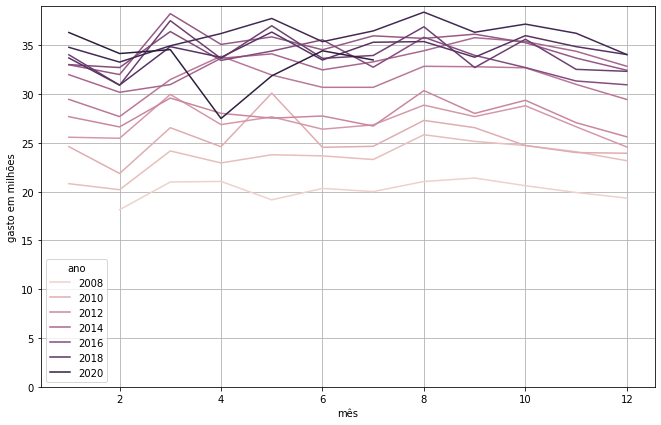

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11,7))
ax = sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='gasto em milhões', hue='ano')
plt.grid()
plt.ylim(0,39)

plt.show()

Percebemos várias oscilações entre os meses. O que parece muito comum em todos os anos, exceto algumas exceções, é haver baixas nos gastos em Fevereiro e em outros meses que possuem menos dias. De Julho para Agosto, que são 2 meses que possuem 31 dias, as linhas costumam apresentar altas. É bom pontuar também que para a maioria dos anos, o mês de Dezembro costuma apresentar baixas em relação a Novembro.

Para fazermos uma melhor comparação entre os meses, seria melhor olhar para a média de gastos diários de cada mês. Para isso, basta dividir os gastos pelo número de dias do mês. Mas antes, precisamos escrever essas quantidades de dias para cada mês.

In [5]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

mensal_aberto['gasto em milhões'] / mensal_aberto['mês'].map(dias_por_mes)

0       6.172676
1       5.499415
2       5.675943
3       5.561361
4       5.847220
          ...   
4045    0.073750
4046    0.059152
4047    0.087130
4048    0.089983
4049    0.069519
Length: 4050, dtype: float64

Agora é só armazenar esses valores em uma nova coluna e plotar o gráfico novamente

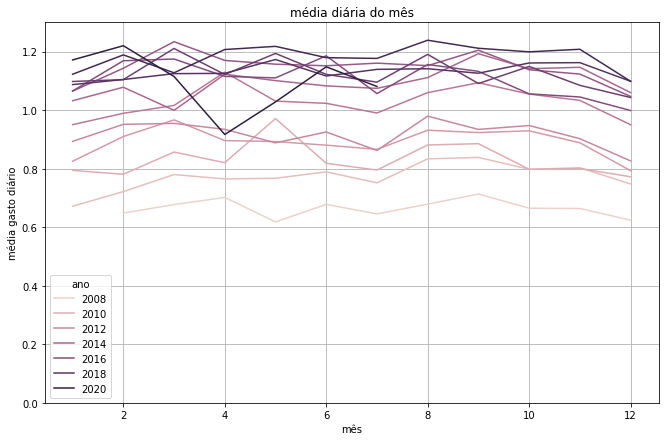

In [6]:
mensal_aberto['média gasto diário'] = mensal_aberto['gasto em milhões'] / mensal_aberto['mês'].map(dias_por_mes)

plt.figure(figsize=(11,7))
ax = sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano')
plt.grid()
plt.ylim(0,1.3)
plt.title('média diária do mês')

plt.show()

Agora é possível ver que em Fevereiro a **média diária** de gastos constuma ser maior que em Janeiro, o que não parecia acontecer vendo o gráfico anterior.

## Desafios

### Desafio 01: Melhorar o gráfico ano a ano:

Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

### Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

### Desafio 01: Melhorar o gráfico ano a ano:
Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

Várias palettes de cores foram testadas e podem ser vistas descomentando as linhas.

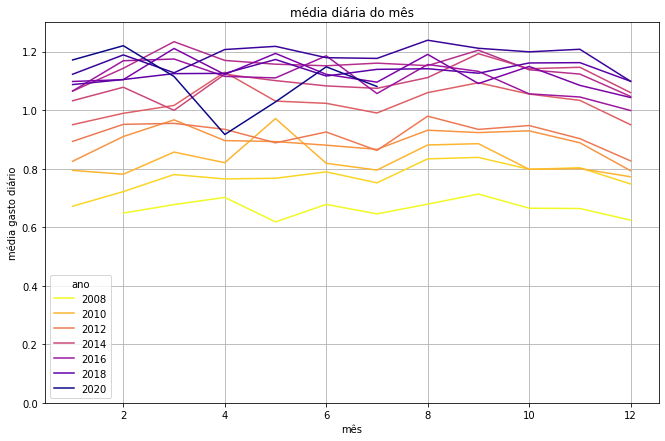

In [7]:
plt.figure(figsize=(11,7))

#palette = sns.color_palette("rocket", as_cmap=True, n_colors=20)
#palette = sns.cubehelix_palette(start=2, rot=1, as_cmap=True)
#palette = sns.dark_palette((260, 75, 60), input="husl", as_cmap=True, reverse=True)
palette = 'plasma_r'

ax = sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano', palette=palette)
plt.grid()
plt.ylim(0,1.3)
plt.title('média diária do mês')

plt.show()

Uma palette de cores sequêncial não parece ser a melhor escolha para representação aqui, pois as cores se aproximam bastante no gráfico e não é possível identificar qual cor representa qual mês. Vamos tentar uma palette do tipo mais categórico.

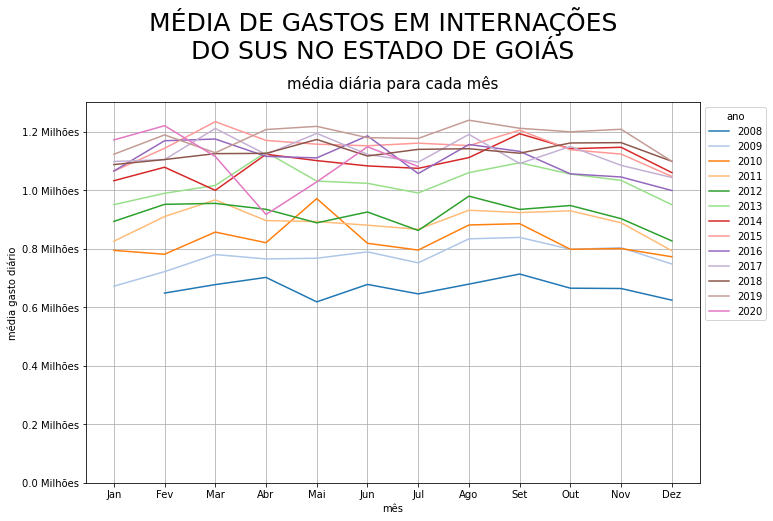

In [8]:
import matplotlib.ticker as ticker

plt.figure(figsize=(11,7))

#palette = sns.color_palette("rocket", as_cmap=True, n_colors=13)
#palette = sns.cubehelix_palette(start=2, rot=1, as_cmap=True)
#palette = sns.dark_palette((260, 75, 60), input="husl", as_cmap=True, reverse=True)
palette = 'tab20'
sns.set_palette(sns.color_palette("rocket", 13))

ax = sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano', palette=palette)
#ax = sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f} Milhões'))
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid()
plt.ylim(0,1.3)
plt.suptitle('média de gastos em internações\ndo SUS no estado de Goiás'.upper(), size=25, y=1.07)
plt.title('média diária para cada mês', y=1.02, size=15)
plt.legend(bbox_to_anchor=(1,1), title='ano')

plt.show()

### Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

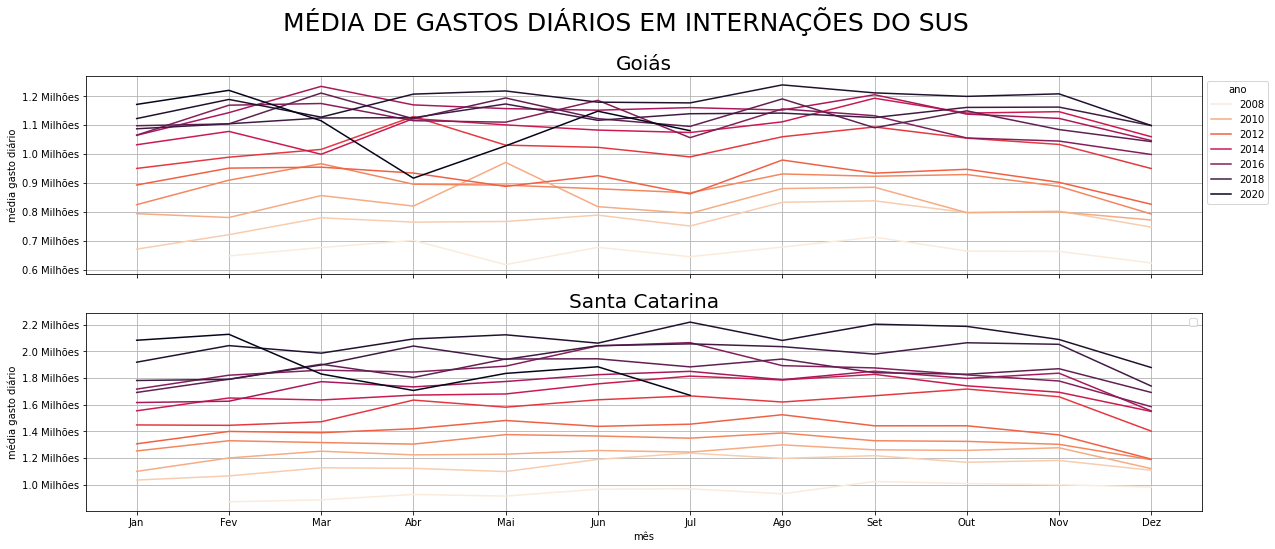

In [9]:
fig, ax = plt.subplots(2,1, figsize=(20,8), sharex=True)

palette = 'tab20'
palette = sns.color_palette("rocket_r", as_cmap=True, n_colors=13)

sns.lineplot(data=mensal_aberto.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano', palette=palette, ax=ax[0])
sns.lineplot(data=mensal_aberto.query('UF=="42 Santa Catarina"'), x='mês', y='média gasto diário', hue='ano', palette=palette, ax=ax[1])

ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f} Milhões'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f} Milhões'))
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[0].grid()
ax[1].grid()
#plt.ylim(0,1.3)
plt.suptitle('média de gastos diários em internações do SUS'.upper(), size=25, y=1.0)
#plt.title('média diária para cada mês', y=2.4, size=15)
ax[0].set_title('Goiás', size=20)
ax[1].set_title('Santa Catarina', size=20)
#plt.legend(bbox_to_anchor=(1,1), title='ano')
ax[0].legend(bbox_to_anchor=(1,1), title='ano')
ax[1].legend('')

plt.show()

# Observação

Muitas linhas estragam a visualização dos dados. Vamos reduzir as informações dos gráficos e agora analisar somente os últimos 4 anos. Agora é bem mais possível visualizar os dados.

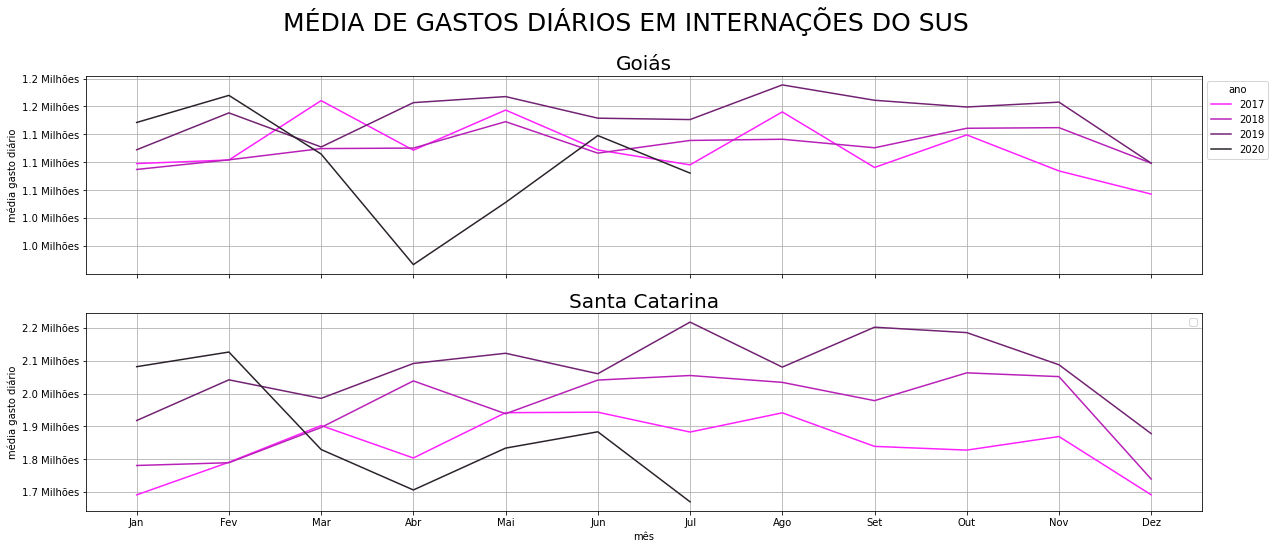

In [24]:
anos_analise = [2020, 2019, 2018, 2017]
mensal_aberto_4_anos = mensal_aberto.query('ano in @anos_analise')

fig, ax = plt.subplots(2,1, figsize=(20,8), sharex=True)

palette = 'tab20'
palette = sns.color_palette("rocket_r", as_cmap=True, n_colors=13)
palette = sns.dark_palette((300, 300, 80), input="husl", reverse=True, as_cmap=True)

sns.lineplot(data=mensal_aberto_4_anos.query('UF=="52 Goiás"'), x='mês', y='média gasto diário', hue='ano', palette=palette, ax=ax[0])
sns.lineplot(data=mensal_aberto_4_anos.query('UF=="42 Santa Catarina"'), x='mês', y='média gasto diário', hue='ano', palette=palette, ax=ax[1])

ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f} Milhões'))
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f} Milhões'))
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax[0].grid()
ax[1].grid()
#plt.ylim(0,1.3)
plt.suptitle('média de gastos diários em internações do SUS'.upper(), size=25, y=1.0)
#plt.title('média diária para cada mês', y=2.4, size=15)
ax[0].set_title('Goiás', size=20)
ax[1].set_title('Santa Catarina', size=20)
#plt.legend(bbox_to_anchor=(1,1), title='ano')
ax[0].legend(bbox_to_anchor=(1,1), title='ano')
ax[1].legend('')

plt.show()